In [2]:
# 1. Import Libraries

import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import feature_column # reformats structured data for ease in calculations
from tensorflow.keras import layers # to create the layer in the neural network
from sklearn.model_selection import train_test_split # splits the data for us
from sklearn.metrics import confusion_matrix # calculates the confusion matrix
from sklearn.metrics import accuracy_score # calculates the accuracy score

import matplotlib.pyplot as plt
%matplotlib inline 
# so that plots remain within the cells


In [3]:
# 2. Declare Parameters

n_features = 2
n_units = 1 # indicates number of neurons

In [4]:
# 3. Declare Weights and Bias

weight = tf.Variable(tf.zeros([n_features,n_units])) # initializing to zero
bias = tf.Variable(tf.zeros([n_units])) # initializing to zero

In [5]:
# 4. Define Perceptron Function

def perceptron(x):
    I = tf.add(tf.matmul(x,weight),bias)
    output = tf.sigmoid(I)
    return output

In [22]:
# 5. Define the Loss Function and Optimizer

individual_loss=lambda: abs(tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=perceptron(x))))

optimizer= tf.keras.optimizers.Adam(.01)

In [23]:
# 6. Read in the Data

dataframe = pd.read_csv('data.csv')
dataframe.head()


,label,x1,x2
0,1,2.6487,4.5192
1,1,1.5438,2.4443
2,1,1.8990,4.2409
3,1,2.4711,5.8097
4,1,3.3590,6.4423


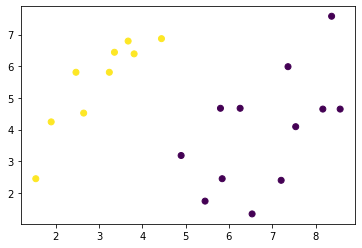

In [24]:
# 7. Visualization of Labels

plt.scatter(dataframe.x1,dataframe.x2,c=dataframe.label)

In [25]:
# 8. Prepare Inputs

x_input = dataframe[['x1','x2']].values
y_label = dataframe[['label']].values

# View the input matrix
x_input

array([[2.6487, 4.5192],
       [1.5438, 2.4443],
       [1.899 , 4.2409],
       [2.4711, 5.8097],
       [3.359 , 6.4423],
       [3.2406, 5.8097],
       [3.8128, 6.3917],
       [4.4441, 6.8725],
       [3.6747, 6.7966],
       [7.5417, 4.0891],
       [7.2063, 2.3937],
       [6.5355, 1.331 ],
       [5.4503, 1.7358],
       [5.8449, 2.4443],
       [4.8979, 3.1781],
       [5.8055, 4.6711],
       [7.3641, 5.9868],
       [6.2592, 4.6711],
       [8.3703, 7.581 ],
       [8.5676, 4.6457],
       [8.1676, 4.6457]])

In [26]:
# 9. Initialize Variables

# Initialize the variable x
x = tf.Variable(x_input)

# Change the datatype of x to 'float32'
x = tf.cast(x,tf.float32)

# Create the y variable
y = tf.Variable(y_label)

# Change the datatype of y to 'float32'
y = tf.cast(y,tf.float32)

In [27]:
# 10. Train the model

for i in range(1000):
    optimizer.minimize(individual_loss,[weight,bias])

In [29]:
# 11. New Values for Weights and Bias

tf.print(weight,bias)

[[-2.42329383]
 [1.85045409]] [1.74988747]


In [30]:
# 12. View the Final Loss
final_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=perceptron(x)))

tf.print(final_loss)

0.534005523


In [33]:
# 13. Predicting Using the Trained Model

ypred = perceptron(x)
ypred = tf.round(ypred) # Round off the output value to 1 or 0. to make the comparison with the target easier

In [36]:
# 14. Evaluate the Model

accuracy_score(y, ypred)
confusion_matrix(y, ypred)

array([[12,  0],
       [ 0,  9]], dtype=int64)